In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
datau=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0299-09.uvel.nc')
plotvaru = datau.variables['uvel'][0,:,:]
lontu = datau.variables['ULON'][:,:]
lattu = datau.variables['ULAT'][:,:]
plotvaru[plotvaru == 0.0] = np.nan
plotvaru[plotvaru >  1000] = np.nan

In [5]:
import math
math.cos(math.radians(lattv[:,3][400]))

0.4800186888548929

In [6]:
lont2 = lontu[200:400,1130]
latt2 = lattu[200:400,1130]

In [8]:
a = np.arange(0,600)
wholedis = np.zeros(600)
for j in a:
    wholedis[j] = 111.34* math.cos(math.radians(lattv[:,700][j]))

In [12]:
###### (u2-u1)/(x2-x1)
a = np.arange(0,600)
b = np.arange(0,3599)
A1= np.zeros([600,3600])
for j in a:
    for i in b:
        A1[j,i] = (plotvaru[j,i+1]-plotvaru[j,i])/((lontv[j,i+1]-lontv[j,i])*wholedis[j])

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


masked

In [10]:
datav=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0299-09.vvel.nc')
plotvarv = datav.variables['vvel'][0,:,:]
lontv = datav.variables['ULON'][:,:]
lattv = datav.variables['ULAT'][:,:]
plotvarv[plotvarv == 0.0] = np.nan
plotvarv[plotvarv >  1000] = np.nan

In [15]:
###### (v2-v1)/(y2-y1)
a = np.arange(0,600)
A2= np.zeros([601,3600])
for i in a:
        A2[i,:] = (plotvarv[i+1,:]-plotvarv[i,:])/((lattu[i+1,:]-lattu[i,:])*110.95)

In [17]:
A2 = A2[0:600,:]

In [51]:
A3 = (A2 - A1)*0.864

In [52]:
lont= lontv[0:600,:]
latt = lattv[0:600,:]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'spacing'


Text(0.5, 0, 'Sea-ice Divergence,  Year 299 September')

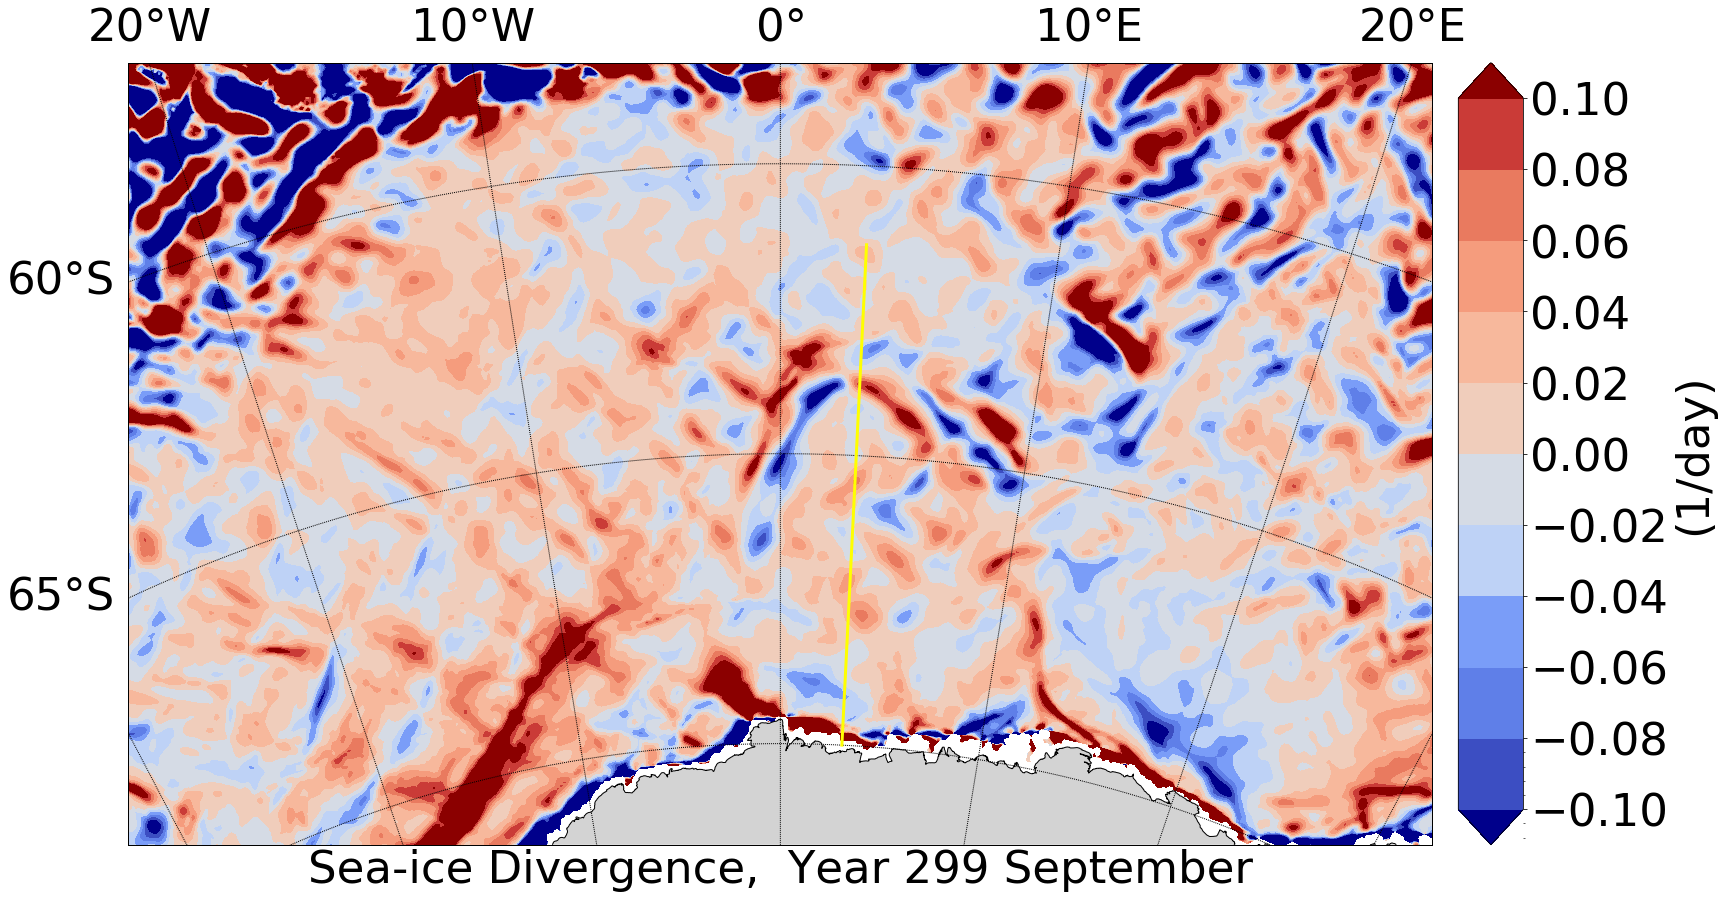

In [53]:
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#lev_cmap = nice_cmap([1,30,70,90,100,130,150,170,190,210,220,230,240]) 
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_cmap=plt.get_cmap('coolwarm')
lev_cmap = nice_cmap([1,30,50,100,120,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
nice_levels = [-0.1,-0.08,-0.06,-0.04,-0.02,0,0.02,0.04,0.06,0.08,0.1]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2500000,height = 1500000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#CP = map.contourf(x,y,A3,range(-2,3),cmap = nice_cmap,extend='both')
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)
CP = map.contourf(x,y,A3,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
CP.cmap.set_over('darkred')
CP.cmap.set_under('darkblue')
#map.drawmeridians([3,-67],[3,-62],'purple',linestyles = 'solid',linewidths=3)
#CS=map.contour(map([2],[-67]),colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,A3,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
#cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar =map.colorbar(CP,ticks=nice_levels)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(1/day)', **my_font)
#cbar.set_label('(1/day)', **my_font)
plt.xlabel("Sea-ice Divergence,  Year 299 September",**my_font)